In [57]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'

In [10]:
genes = ['npm2a', 'mcm6l', 'mcm3l', 'ftr81', 'zgc:56231', 'zgc:165514']
total_embryo = [50, 51, 31, 3, 29, 8]
homo_embryo = [3, 1, 5, 0, 0, 0]

plot_df = pd.DataFrame([genes, total_embryo, homo_embryo]).T
plot_df.columns = ['Mutant', 'N', 'Homo']
plot_df['Homo_ratio'] = plot_df['Homo'] / plot_df['N']
plot_df['Hetero_ratio'] = 1 - (plot_df['Homo'] / plot_df['N'])

In [11]:
plot_df

,Mutant,N,Homo,Homo_ratio,Hetero_ratio
0,npm2a,50,3,0.06,0.94
1,mcm6l,51,1,0.019608,0.980392
2,mcm3l,31,5,0.16129,0.83871
3,ftr81,3,0,0.0,1.0
4,zgc:56231,29,0,0.0,1.0
5,zgc:165514,8,0,0.0,1.0


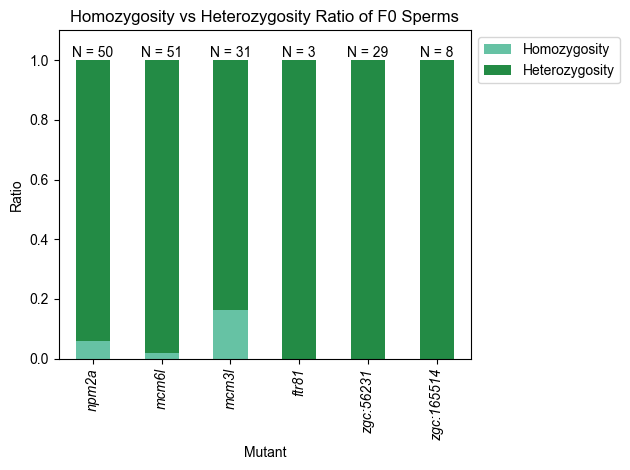

In [61]:
fig, ax = plt.subplots(figsize=(6.4, 4.8), tight_layout=True)
colormap = plt.cm.get_cmap('BuGn', plot_df.shape[1])
colors = [colormap(i) for i in np.linspace(0.5, 1.5, 5)]
ax = plot_df.plot(kind='bar', stacked=True, x='Mutant', y=['Homo_ratio', 'Hetero_ratio'], color = colors, ax = ax)
for idx, row in plot_df.iterrows():
    ax.text(idx, row['Homo_ratio'] + row['Hetero_ratio'], 'N = ' + str(row['N']), ha='center', va='bottom')
    
ax.legend(loc='upper left', bbox_to_anchor=(1,1), handles=ax.get_legend_handles_labels()[0], title = '', labels = ['Homozygosity', 'Heterozygosity'])
ax.set_ylim(0, 1.1)
# font_style = 'italic' 
# ax.set_xticklabels(font_style = font_style, labels = ax.get_xticklabels())
# Set the xtick labels to italic
for label in ax.get_xticklabels():
    label.set_fontstyle('italic')

ax.set_title('Homozygosity vs Heterozygosity Ratio of F0 Sperms')
ax.set_xlabel('Mutant')
ax.set_ylabel('Ratio')
fig.savefig('../figures/make3_FigR6_sperm_homo_ratio.pdf', transparent=True)
